In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json

In [ ]:
# CSV Format

csv = pd.read_csv("/sales_data_sample.csv", encoding="cp1252")

csv.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [ ]:
# This library is specifically designed for reading data from older Excel files (.xls format).

!pip install xlrd

In [ ]:
# Excel Format

ed = pd.read_excel("/excel_dataset.xls", engine='xlrd')

ed.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [ ]:
# JSON Format

with open("/customers.json", "r") as json_file:
 json_data = json.load(json_file)

json_df = pd.DataFrame(json_data)

json_df.tail()

,id,email,first,last,company,created_at,country
9994,9995,delores_cruickshank@gmail.com,Robert,Batz,Carter-Tillman,2014-04-02T19:13:57.592Z,Yemen
9995,9996,marley_brown32@hotmail.com,Leone,Reinger,Smitham and Daughters,2014-07-01T18:45:06.223Z,Argentina
9996,9997,raymond68@hotmail.com,Clementina,Bode,VonRueden LLC,2014-06-12T18:38:54.222Z,Lao People's Democratic Republic
9997,9998,juston_powlowski@hotmail.com,Yvonne,Prosacco,Green Inc,2015-02-04T18:54:09.035Z,Holy See (Vatican City State)
9998,9999,orion.senger72@yahoo.com,Darrin,Connelly,Funk and Daughters,2015-01-21T11:20:51.483Z,Niger


In [ ]:
# Checking null values

csv.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [ ]:
# Handling missing values

csv['ADDRESSLINE2'] = csv['ADDRESSLINE2'].fillna(1)

csv['STATE'] = csv['STATE'].fillna('Maharashtra')

csv['POSTALCODE'] = csv['POSTALCODE'].bfill()

csv['TERRITORY'] = csv['TERRITORY'].fillna('India')

csv.isnull().sum()


,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [ ]:
# Assume df1 and df2 are two dataframes with a common column 'id'
# merged_data = pd.merge(df1, df2, on='id', how='inner')

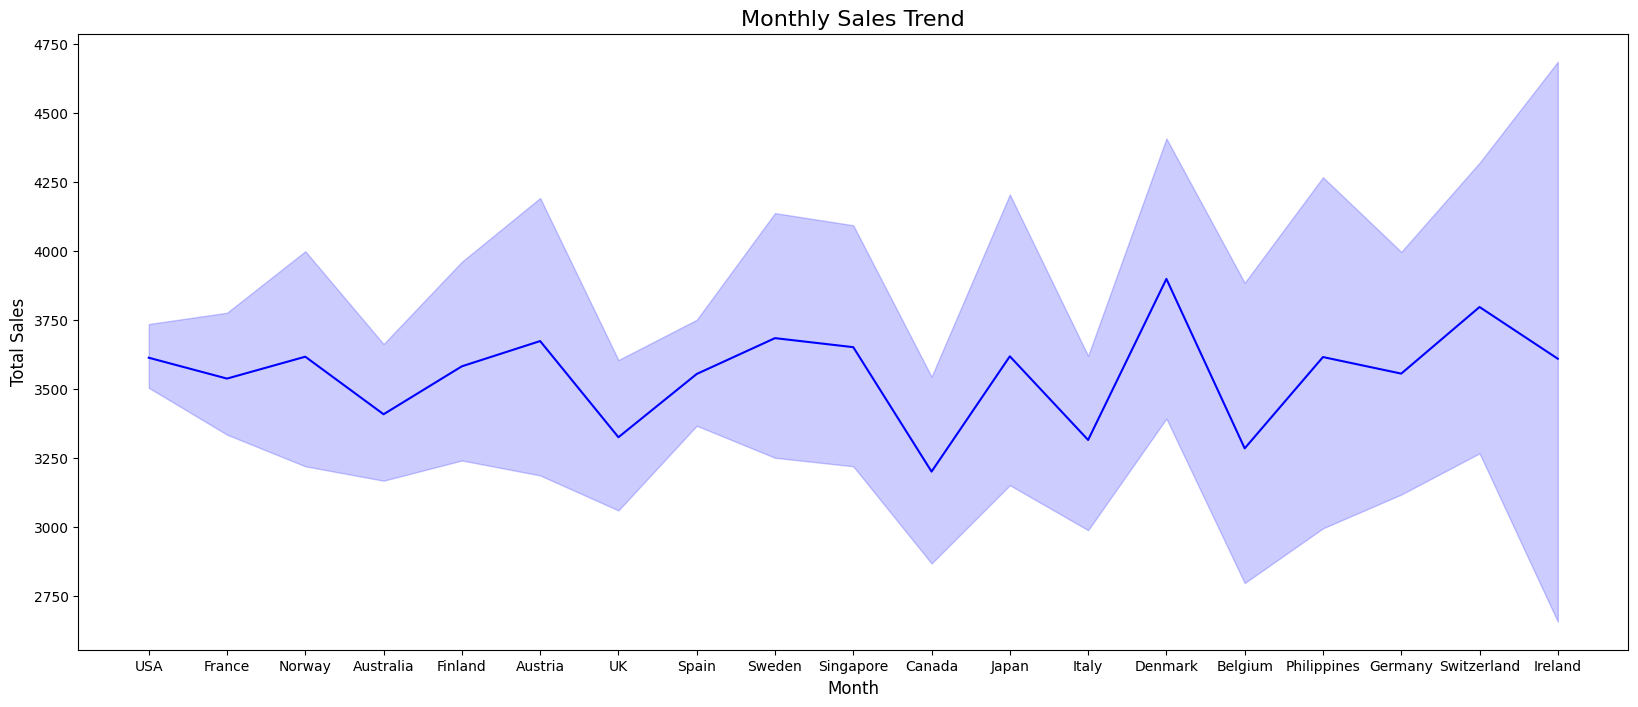

In [ ]:
# Line plot

import seaborn as sns

plt.figure(figsize=(20, 8))
sns.lineplot(x = 'COUNTRY', y = 'SALES', data = csv, color='b')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

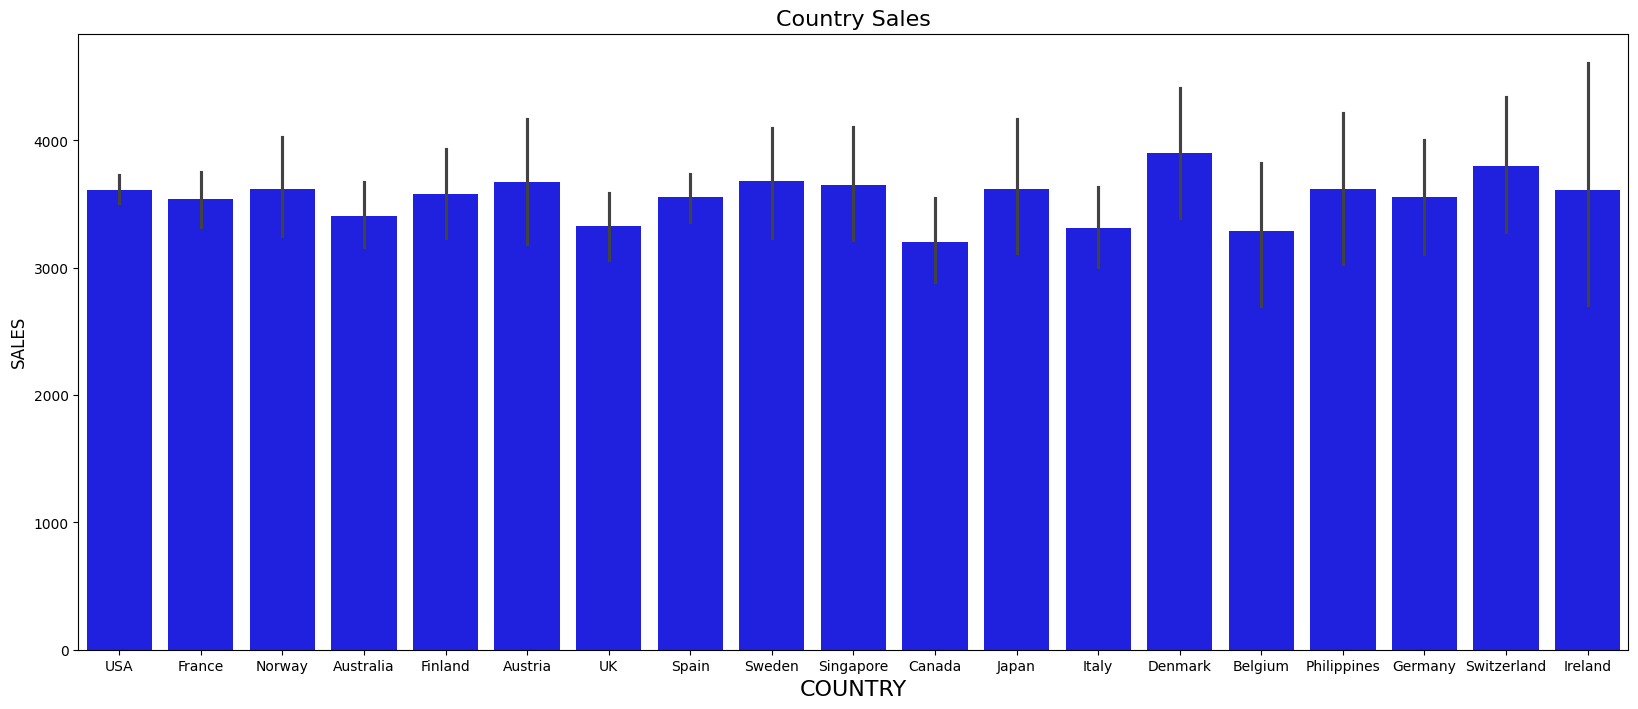

In [ ]:
# bar plot

plt.figure(figsize=(20, 8))
sns.barplot(x = 'COUNTRY', y = 'SALES', data = csv, color='b')
plt.xlabel('COUNTRY', fontsize=16)
plt.ylabel('SALES', fontsize=12)
plt.title('Country Sales', fontsize=16)
plt.show()

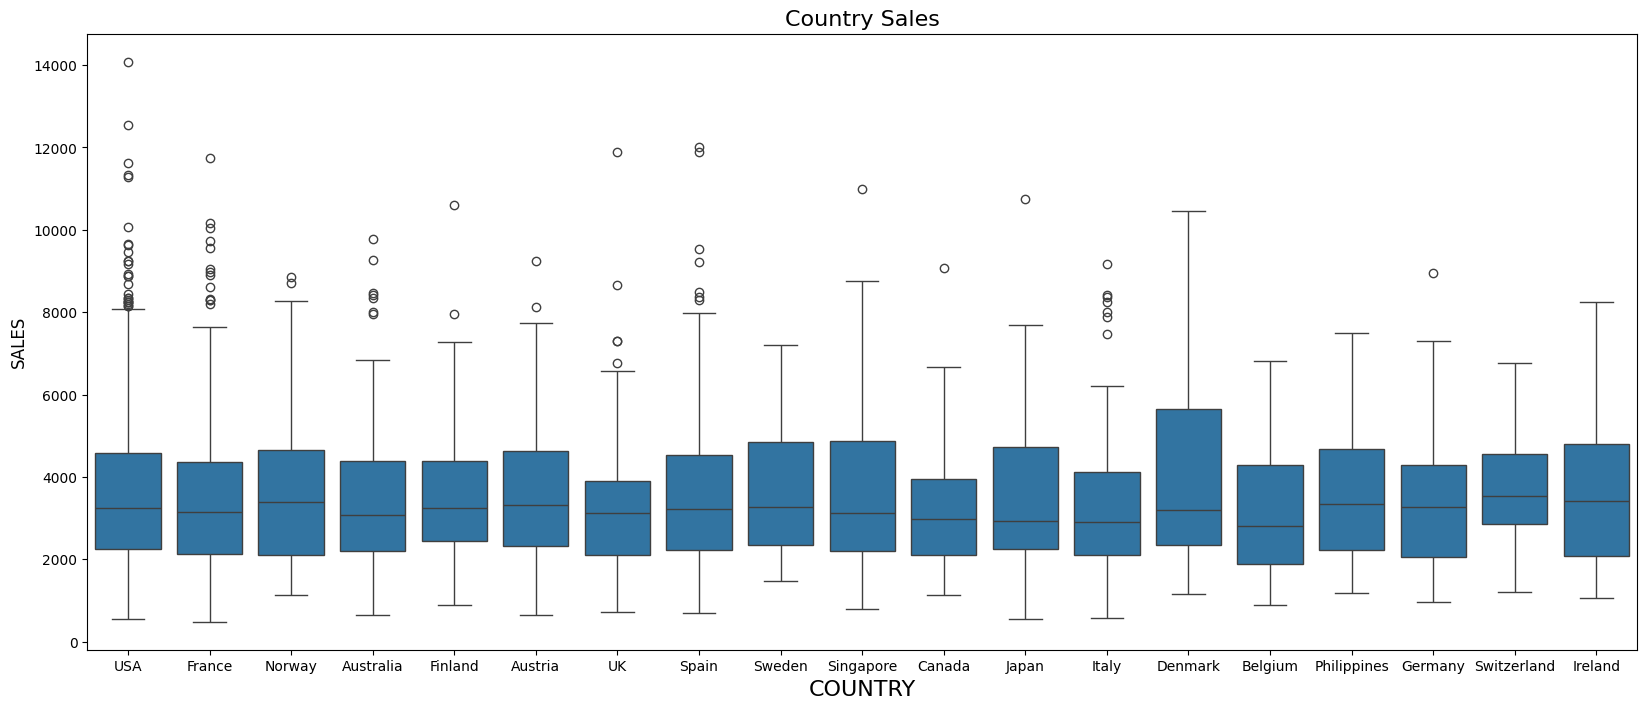

In [ ]:
# box plot

plt.figure(figsize=(20, 8))
sns.boxplot(x = 'COUNTRY', y = 'SALES', data = csv)
plt.xlabel('COUNTRY', fontsize=16)
plt.ylabel('SALES', fontsize=12)
plt.title('Country Sales', fontsize=16)
plt.show()